In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline 

rnd_state = 983

In [2]:
data = pd.read_csv("data/bikes_rent.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [3]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
data.dropna(inplace=True)

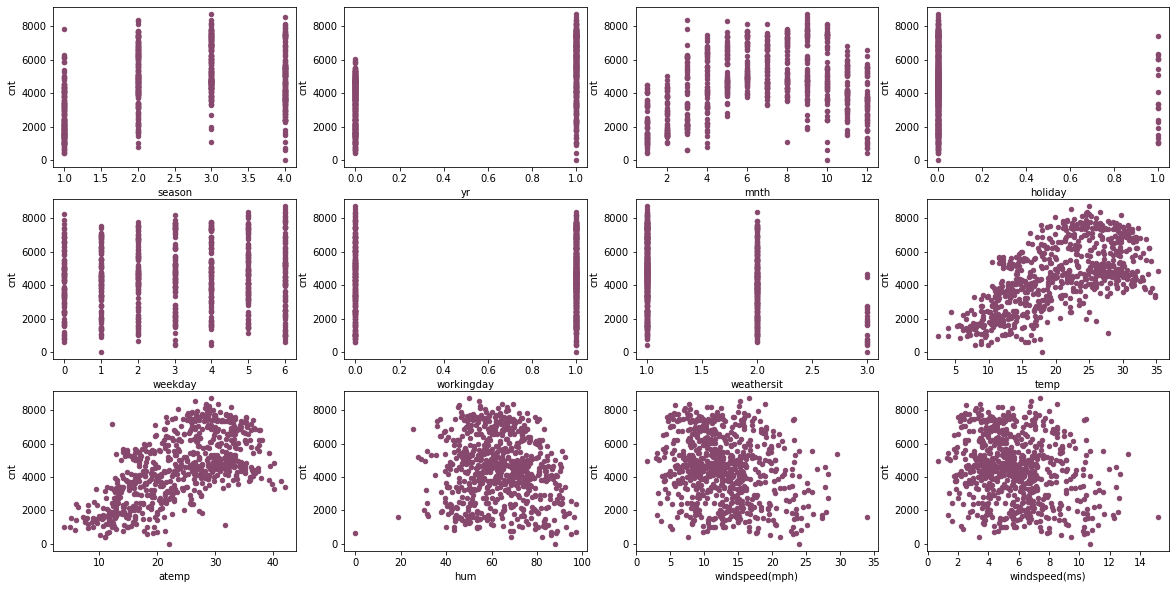

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
for idx, feature in enumerate(data.columns.values[:-1]):
    data.plot(feature, 'cnt', subplots=True, kind='scatter', ax=axes[int(idx / 4), idx % 4], c='#87486e');

In [7]:
data.iloc[:, :12].corrwith(data['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

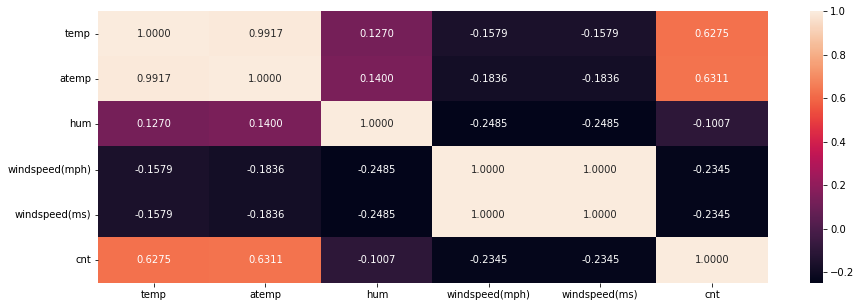

In [8]:
plt.figure(figsize=(15, 5))
sns.heatmap(data[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr(), annot=True, fmt='1.4f');

In [9]:
predictors = data.iloc[:, :12]
target = data['cnt']

In [10]:
(predictors_train, predictors_test,
 target_train, target_test) = train_test_split(predictors, target, test_size = .3, random_state = rnd_state)

In [ ]:
model = LassoLarsCV(cv=10, precompute=False).fit(predictors_train, target_train)

In [12]:
dict(zip(predictors.columns, model.coef_))

{'atemp': 63.56915200306636,
 'holiday': -282.4317487350739,
 'hum': -12.815264427009323,
 'mnth': 0.0,
 'season': 381.77762475079953,
 'temp': 58.03564770387192,
 'weathersit': -514.6381162101687,
 'weekday': 69.84812053893575,
 'windspeed(mph)': 0.0,
 'windspeed(ms)': -95.71090321577535,
 'workingday': 36.15135752613219,
 'yr': 2091.518292751788}

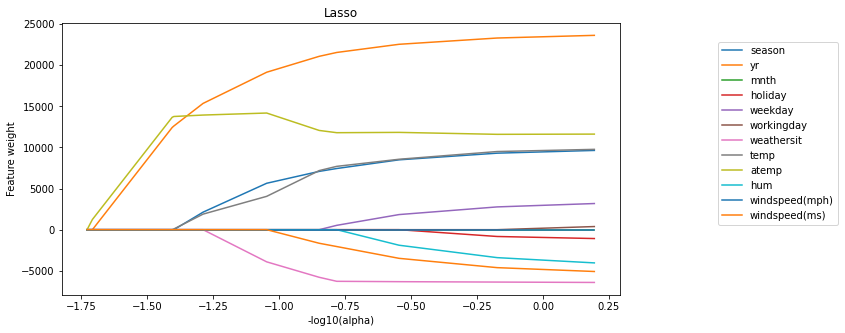

In [13]:
log_alphas = -np.log10(model.alphas_)
plt.figure(figsize=(10, 5))
for idx, feature in enumerate(predictors.columns):
    plt.plot(log_alphas, list(map(lambda r: r[idx], model.coef_path_.T)), label=feature)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("-log10(alpha)")
plt.ylabel("Feature weight")
plt.title("Lasso");

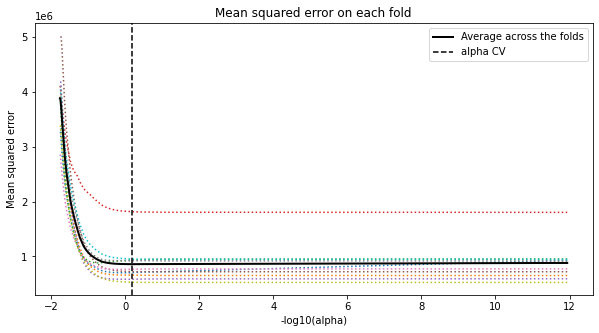

In [14]:
log_cv_alphas = -np.log10(model.cv_alphas_)
plt.figure(figsize=(10, 5))
plt.plot(log_cv_alphas, model.mse_path_, ':')
plt.plot(log_cv_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log10(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold');

In [15]:
rsquared_train = model.score(predictors_train, target_train)
rsquared_test = model.score(predictors_test, target_test)
print('Train data R-square', rsquared_train)
print('Test data R-square', rsquared_test)

Train data R-square 0.7899877818517489
Test data R-square 0.813187152761419
